In [1]:
from plot import *
from gen import *
from load_data import *
from func_tools import *
from AGMandGM import *

### 生成随机数

In [2]:
# 这里使用默认的参数，按照均匀分布的中心点
# TODO: task 上说可以尝试有趣的pattern，我们可以手动给定centroid再生成周围点，详见 gen.py 的文档
centroids, points, N = gen_data() 

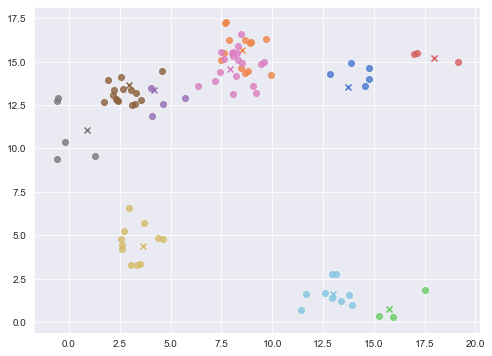

In [3]:
# 简单画个图
plt.figure(figsize=(8,6))
plot_generated_data(centroids, points, N)

### 读取数据

In [4]:
# wine, mnist, vowel, segment 可替换
# 加载稀疏矩阵
wine_data, wine_label = load_wine()
# 加载稠密矩阵
wine_data_dense, wine_label = load_wine_dense()

## AGM Sample

In [5]:
lbd = 0.1
delta = 1e-3
tol = 0.0001
n = len(points)
step = step_size(n,lbd,delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd)
func = lambda X: function1(X, points, lbd, delta)
stepsize_method = lambda X,step_size: bck(func, grad, X, step_size, gamma, sigma)

In [6]:
ans = AGM(func, grad,np.zeros_like(points),step,tol)  # x0是和points形状一样的0

              t      beta       f_value        loss
0      1.618034  0.000000  10035.341699  141.671039
0      2.193527  0.000000  10033.036345  127.398463
0      2.749791  0.281754  10031.067269  127.202254
0      3.294880  0.434043  10028.556061  127.088265
0      3.832601  0.531064  10025.515517  127.015870
..          ...       ...           ...         ...
0   3113.507399  0.999518   1159.490744    0.011169
0   3114.007439  0.999518   1159.472772    0.008358
0   3114.507479  0.999518   1159.454812    0.005547
0   3115.007519  0.999518   1159.436867    0.002738
0   3115.507559  0.999518   1159.418938    0.000070

[6225 rows x 4 columns]
Used seconds: 43.53039216995239


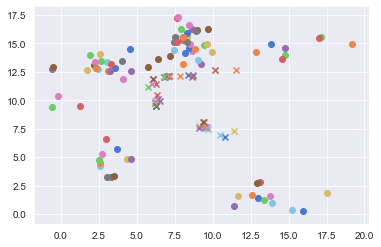

In [7]:
plot_res_data(points,ans)

## GM Sample

In [ ]:
lbd = 0.1
delta = 1e-3
tol = 0.0001
step_size0 = 1
gamma = 0.01
sigma = 0.5
gm_result = GM(func, grad, stepsize_method, np.zeros_like(points), step_size0, tol)
plot_res_data(points, gm_result)